# **Initial Setup**

In [ ]:
#### Imports
import csv
import datetime as dt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from  matplotlib.ticker import FuncFormatter
%config InlineBackend.figure_format = 'png'
%matplotlib inline

#### To ensure tables show all columns (or most of them)
pd.options.display.max_columns = 100;

#### Style of plots

sns.set_style("white")

tablePath = './SLR_NFR_CLASSIFICATION.xlsx'

#### Custom parameters
studyDataSum = pd.read_excel(tablePath, sheet_name='selected_papers_summary')

#studyDataEval = pd.read_excel(tablePath, sheet_name='selected_papers_evaluation')
studyDataAlg = pd.read_excel(tablePath, sheet_name='selected_papers_algorithms')

### Renaming some blank collumns
#studyDataEval.rename(columns={list(studyDataEval)[2]:'Type'},inplace=True)
studyDataAlg.rename(columns={list(studyDataAlg)[2]:'AlgorithmType'},inplace=True)


# **Functions for DataVisualization**

In [ ]:
def ShowMostUsedNFR(colorText):
  nfrFrequencyRow = studyDataSum['NFR(s)'].str.split(',').apply(Counter) ##Counting occurrences for each item in it's line/row
  totalFrequency = nfrFrequencyRow.sum() ##Summing all occurences to get the total accross all studies
  nfrFreq_df = pd.DataFrame.from_dict(totalFrequency, orient='index', columns=['Times Mentioned'])
  nfrFreq_df['NFR'] = nfrFreq_df.index
  nfrFreq_df.reset_index()

  color = sns.color_palette(colorText)

  ### Plotting
  # Identify the "Other" NFR
  other_mask = nfrFreq_df['NFR'] == 'Other'

  # If "Other" is not in the DataFrame, add it with 0 mentions
  if not other_mask.any():
    nfrFreq_df = pd.concat([nfrFreq_df, pd.DataFrame({'NFR': ['Other'], 'Times Mentioned': [0]})], ignore_index=True)
    other_mask = nfrFreq_df['NFR'] == 'Other'  # Update the mask

  # Sort the DataFrame excluding "Other"
  nfrFreq_df_sorted = nfrFreq_df[~other_mask].sort_values(by='Times Mentioned', ascending=False)

  # Append the "Other" row to the sorted DataFrame
  nfrFreq_df = pd.concat([nfrFreq_df_sorted, nfrFreq_df[other_mask]])

  plt.figure(figsize=(12, 9))
  sns.set_theme(style='white',font_scale=0.95,palette=colorText)
  ax = sns.barplot(nfrFreq_df,x='Times Mentioned',y='NFR',hue='NFR')

  ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x)))

  for index,row in nfrFreq_df.iterrows():
    indexer = nfrFreq_df.index.get_loc(index)
    ax.bar_label(ax.containers[indexer])

  ax.tick_params(axis='x',pad=-5)
  ax.tick_params(axis='y',pad=-4)
  sns.despine()
  plt.grid()
  plt.show()

def ShowMostUsedDataSets(colorText):
  datasetFrequencyRow = studyDataSum['Dataset: Name/Reference'].str.split(',').apply(Counter)
  totalDatasetFrequency = datasetFrequencyRow.sum()
  datasetFreq_df = pd.DataFrame.from_dict(totalDatasetFrequency, orient='index', columns=['frequency'])
  datasetFreq_df['Dataset'] = datasetFreq_df.index
  datasetFreq_df.reset_index()
  datasetFreq_df = datasetFreq_df[datasetFreq_df.Dataset != 'Not Specified']

  color = sns.color_palette(colorText)

  ### Plotting
  datasetFreq_df.sort_values(by='frequency',ascending=False,inplace=True)
  plt.pie(datasetFreq_df['frequency'],colors=color,autopct=autopct_format(datasetFreq_df['frequency']), explode=(datasetFreq_df['frequency'] == max(datasetFreq_df['frequency'])) *0.05)
  plt.legend(title ="Datasets",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1),labels=datasetFreq_df['Dataset'])
  plt.show()


def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{v:d}'.format(v=val)
    return my_format

def ShowMostUsedAlgorithms(colorText):
  studyDataAlgTypes = studyDataAlg['AlgorithmType']
  key = ''
  counter = 1
  resultDict ={}
  datalist = list(studyDataAlgTypes)
  key = str(datalist[0])

  for i in range(len(datalist)):
    if i < len(datalist)-1:
      if datalist[i+1] == '':
        counter+=1
      else:
        resultDict[key] = counter
        key = datalist[i+1]
        counter = 1

  studyAlg_df = pd.DataFrame.from_dict(resultDict,orient='index', columns=['Nº of papers implementing a technique'])
  studyAlg_df['Technique'] = studyAlg_df.index
  studyAlg_df.reset_index()

  color = sns.color_palette(colorText)

  ### Plotting
  studyAlg_df.sort_values(by='Nº of papers implementing a technique',ascending=False,inplace=True)
  sns.set_theme(style='white',font_scale=0.95,palette=colorText)
  ax = sns.barplot(studyAlg_df,x='Nº of papers implementing a technique',y='Technique',hue='Technique')
  ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x)))

  for index,row in studyAlg_df.iterrows():
    indexer = studyAlg_df.index.get_loc(index)
    ax.bar_label(ax.containers[indexer])

  ax.tick_params(axis='x',pad=-3)
  ax.tick_params(axis='y',pad=2)
  sns.despine()
  plt.grid()
  plt.show()


# Applying Functions

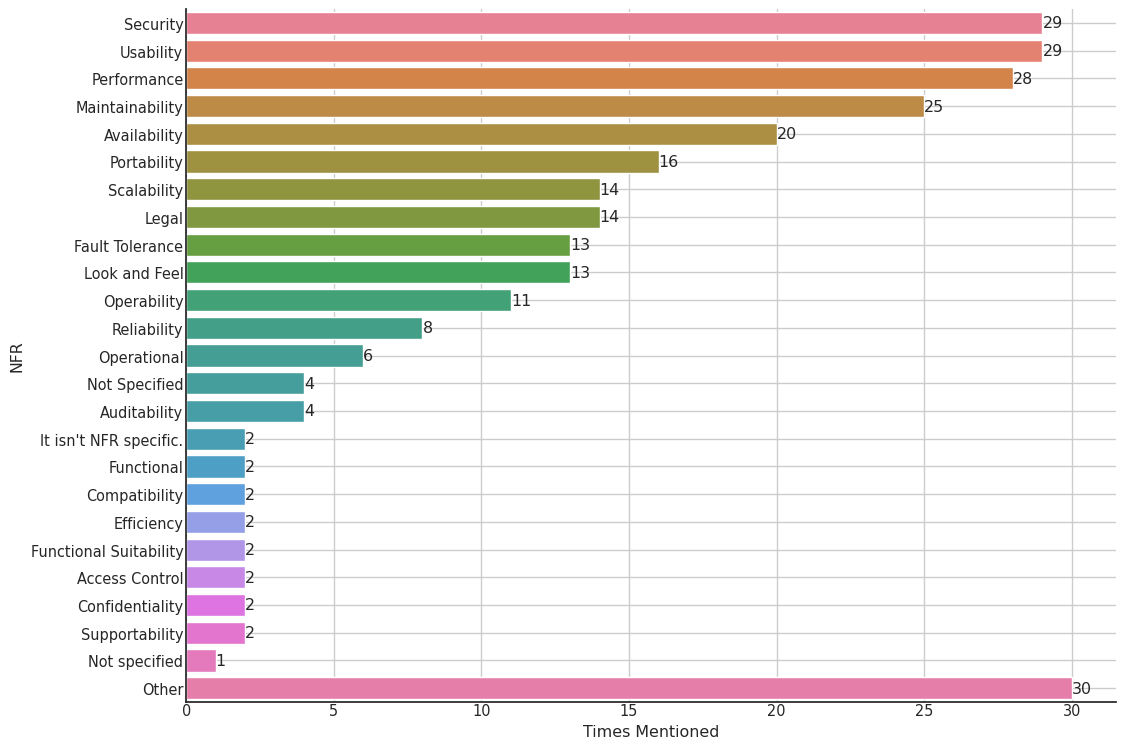

In [ ]:
ShowMostUsedNFR("tab20")

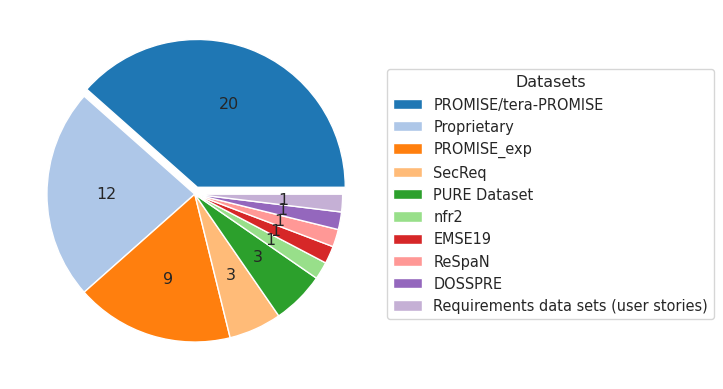

In [ ]:
ShowMostUsedDataSets("tab20")

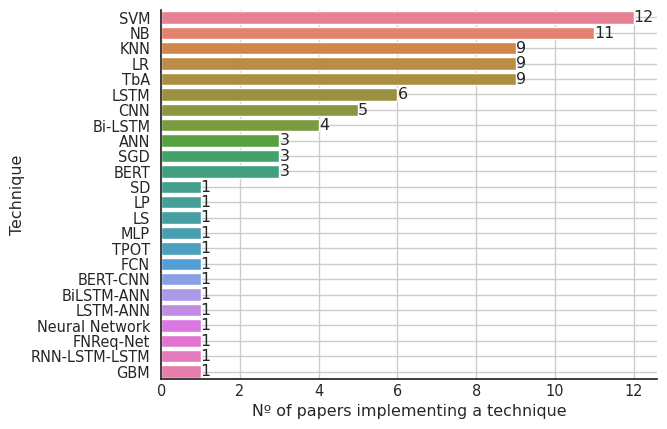

In [ ]:
ShowMostUsedAlgorithms("tab20")